<a href="https://colab.research.google.com/github/mmouadd/GdKI/blob/main/Aufgabe_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
 !pip install tf-nightly

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import  models
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [16]:
import pathlib
path_dataset_drive = "/content/drive/MyDrive/KI Projekt - Dataset/Aufgabe_4_Dataset/train" 
dataset_dir = pathlib.Path(path_dataset_drive)

In [46]:
batch_size = 16
img_height = 180
img_width = 180

In [47]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 15159 files belonging to 30 classes.
Using 12128 files for training.
Found 15159 files belonging to 30 classes.
Using 3031 files for validation.


In [48]:
class_dataset = train_ds.class_names
print(class_dataset)

['Angela Merkel', 'Angelina Jolie', 'Bill Gates', 'Boris Johnson', 'Conor Mcgregor', 'Cristiano Ronaldo', 'Donald Trump', 'Dwayne Johnson', 'Elon Musk', 'Emma Watson', 'Emmanuel Macron', 'Eva Mendes', 'Jeff Bezos', 'Jennifer Lopez', 'Justin Trudeau', 'Lebron James', 'Leonardo Dicaprio', 'Lewis Hamilton', 'Lionel Messi', 'Mark Zuckerberg', 'Max Verstappen', 'Minka Kelly', 'Neymar Jr', 'Olaf Scholz', 'Rafael Nadal', 'Roger Federer', 'Shakira', 'Tiger Woods', 'Tom Cruise', 'Vladimir Putin']


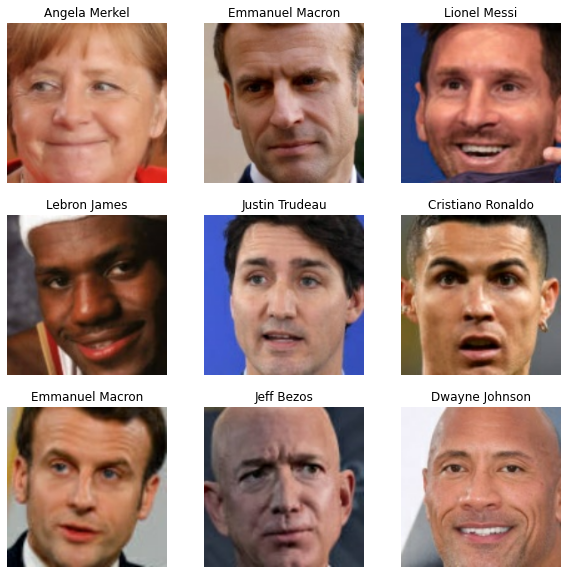

In [49]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_dataset[labels[i]])
          plt.axis("off")

In [50]:
normalization_layer =layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.15528406 0.90847164


In [51]:
num_classes = 30
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [52]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [53]:
history = model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
758/758 [==============================] - 1659s 2s/step - loss: 1.6840 - accuracy: 0.5275 - val_loss: 0.7038 - val_accuracy: 0.8106
Epoch 2/50
758/758 [==============================] - 427s 563ms/step - loss: 0.4094 - accuracy: 0.8878 - val_loss: 0.5163 - val_accuracy: 0.8710
Epoch 3/50
758/758 [==============================] - 426s 562ms/step - loss: 0.1613 - accuracy: 0.9528 - val_loss: 0.5749 - val_accuracy: 0.8779
Epoch 4/50
758/758 [==============================] - 426s 561ms/step - loss: 0.0975 - accuracy: 0.9699 - val_loss: 0.4293 - val_accuracy: 0.9056
Epoch 5/50
758/758 [==============================] - 425s 560ms/step - loss: 0.0588 - accuracy: 0.9828 - val_loss: 0.5188 - val_accuracy: 0.8997
Epoch 6/50
758/758 [==============================] - 427s 563ms/step - loss: 0.0557 - accuracy: 0.9840 - val_loss: 0.6007 - val_accuracy: 0.8957
Epoch 7/50
758/758 [==============================] - 425s 560ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.6362 - v

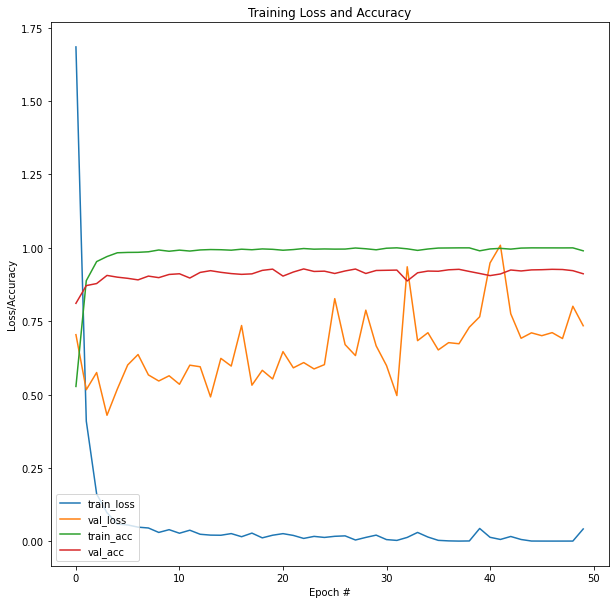

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)
plt.figure(figsize=(10, 10))
epochs = 50
N = epochs
plt.plot(np.arange(0,N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='lower left')
plt.show()

In [55]:
import cv2 #opencv itself

import numpy as np # matrix manipulations

1/1 [==============================] - 0s 34ms/step
predection is for Shakira with a 100.00percent confidence.


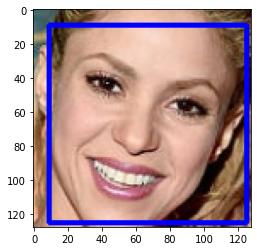

In [68]:
path="/content/drive/MyDrive/KI Projekt - Dataset/Aufgabe_4_Dataset/test/Shakira/458.jpg"
base_image = cv2.imread(path)
img=keras.preprocessing.image.load_img(
    path,target_size=(img_height,img_width)
)
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(base_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
print("predection is for {} with a {:.2f}percent confidence.".format(class_dataset[np.argmax(score)],100*np.max(score)))